# LSTM
#### 빅데이터분석및활용 26장 수업 내용 참고


In [48]:
import numpy as np
import pandas as pd
from IPython.display import display

In [49]:

# 한글 폰트 설정
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [50]:
df2 = pd.read_csv('./data/test_Gonion.csv', index_col=0)
display(df2)

,날짜,품목명,평균가격,전일평균가격,전년가격,등급
1,20170101,대파(일반),0.0,2833.0,0.0,특
2,20170101,대파(일반),0.0,2164.0,0.0,상
3,20170101,대파(일반),0.0,1747.0,0.0,중
4,20170101,대파(일반),0.0,1214.0,0.0,하
1,20170102,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
4,20210526,대파(일반),1180.0,1392.0,1208.0,하
1,20210527,대파(일반),3699.0,3601.0,1952.0,특
2,20210527,대파(일반),1554.0,2152.0,1639.0,상
3,20210527,대파(일반),1247.0,1572.0,1500.0,중


In [51]:
dfw = pd.read_csv('./data/weather.csv', encoding='CP949')
display(dfw)

,지점,지점명,일시,평균기온(°C),일강수량(mm),일 최심신적설(cm)
0,268,진도군,20170101,4.3,NaN,NaN
1,268,진도군,20170102,8.1,0.0,NaN
2,268,진도군,20170103,5.1,NaN,NaN
3,268,진도군,20170104,4.4,NaN,NaN
4,268,진도군,20170105,7.5,0.5,NaN
...,...,...,...,...,...,...
1590,268,진도군,20210523,19.7,0.0,NaN
1591,268,진도군,20210524,17.6,0.0,NaN
1592,268,진도군,20210525,17.3,NaN,NaN
1593,268,진도군,20210526,17.1,0.7,NaN


In [52]:
# nan to zero
dfw=dfw.fillna(0)

In [53]:
index = range(df2.shape[0])
df2.index = index
display(df2)

,날짜,품목명,평균가격,전일평균가격,전년가격,등급
0,20170101,대파(일반),0.0,2833.0,0.0,특
1,20170101,대파(일반),0.0,2164.0,0.0,상
2,20170101,대파(일반),0.0,1747.0,0.0,중
3,20170101,대파(일반),0.0,1214.0,0.0,하
4,20170102,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
6385,20210526,대파(일반),1180.0,1392.0,1208.0,하
6386,20210527,대파(일반),3699.0,3601.0,1952.0,특
6387,20210527,대파(일반),1554.0,2152.0,1639.0,상
6388,20210527,대파(일반),1247.0,1572.0,1500.0,중


In [54]:
temp_list = []
rain_list = []
day_list = []
count = 0
for i1 in df2.index:
    for i2 in dfw.index:
        if df2['날짜'][i1] != dfw['일시'][i2]:
            continue
        temp_list.append(dfw['평균기온(°C)'][i2])
        rain_list.append(dfw['일강수량(mm)'][i2])
        day_list.append(dfw['일시'][i2])
        count +=1


print('temp_list', temp_list)
print(len(temp_list))
print('rain_list', rain_list)
print(len(rain_list))

temp_list [4.3, 4.3, 4.3, 4.3, 8.1, 5.1, 5.1, 5.1, 5.1, 4.4, 4.4, 4.4, 4.4, 7.5, 7.5, 7.5, 7.5, 7.2, 7.2, 7.2, 7.2, 7.1, 7.1, 7.1, 7.1, 8.1, 5.6, 5.6, 5.6, 5.6, 4.2, 4.2, 4.2, 4.2, 1.9, 1.9, 1.9, 1.9, 3.7, 3.7, 3.7, 3.7, 3.1, 3.1, 3.1, 3.1, 0.1, 0.1, 0.1, 0.1, -0.5, 1.8, 1.8, 1.8, 1.8, 0.8, 0.8, 0.8, 0.8, 3.5, 3.5, 3.5, 3.5, 2.5, 2.5, 2.5, 2.5, 0.8, 0.8, 0.8, 0.8, 1.9, 1.9, 1.9, 1.9, 0.2, -0.5, -0.5, -0.5, -0.5, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 1.3, 1.3, 1.3, 1.3, 3.1, 3.1, 3.1, 3.1, 3.9, 3.9, 3.9, 3.9, 8.8, 1.2, -0.4, -0.4, -0.4, -0.4, 1.8, 1.8, 1.8, 1.8, 0.9, 0.9, 0.9, 0.9, 1.7, 1.7, 1.7, 1.7, 6.9, 6.9, 6.9, 6.9, 6.2, 2.9, 2.9, 2.9, 2.9, 2.4, 2.4, 2.4, 2.4, 2.6, 2.6, 2.6, 2.6, 0.0, 0.0, 0.0, 0.0, -1.5, -1.5, -1.5, -1.5, 0.2, 0.2, 0.2, 0.2, 1.7, 2.9, 2.9, 2.9, 2.9, 3.8, 3.8, 3.8, 3.8, 2.1, 2.1, 2.1, 2.1, 8.5, 8.5, 8.5, 8.5, 5.1, 5.1, 5.1, 5.1, 0.7, 0.7, 0.7, 0.7, 6.0, 3.8, 3.8, 3.8, 3.8, 3.2, 3.2, 3.2, 3.2, 8.1, 8.1, 8.1, 8.1, 2.6, 2.6, 2.6, 2.6, 1.6, 1.6, 1.6, 1.6, 4.0, 4.0, 4

In [55]:
dd=np.array(df2['날짜'].tolist())
dl=np.array(day_list)
intersection = np.array(list(set(dd)-set(dl)))
print(intersection)
print(len(intersection))



[20170720 20170721 20170722 20190529 20191202 20191017 20191018 20171116
 20171221 20171222 20171031 20171130 20200702]
13


In [56]:
tf=[]

for i in df2.index:
    if df2['날짜'][i] in intersection:
        df2= df2.drop(index=i, axis=0)

df22= df2.copy()
print(len(df22.index))



6338


In [57]:
df22['평균기온'] = temp_list
df22['강수량'] = rain_list
display(df22)

,날짜,품목명,평균가격,전일평균가격,전년가격,등급,평균기온,강수량
0,20170101,대파(일반),0.0,2833.0,0.0,특,4.3,0.0
1,20170101,대파(일반),0.0,2164.0,0.0,상,4.3,0.0
2,20170101,대파(일반),0.0,1747.0,0.0,중,4.3,0.0
3,20170101,대파(일반),0.0,1214.0,0.0,하,4.3,0.0
4,20170102,NaN,NaN,NaN,NaN,NaN,8.1,0.0
...,...,...,...,...,...,...,...,...
6385,20210526,대파(일반),1180.0,1392.0,1208.0,하,17.1,0.7
6386,20210527,대파(일반),3699.0,3601.0,1952.0,특,16.9,0.6
6387,20210527,대파(일반),1554.0,2152.0,1639.0,상,16.9,0.6
6388,20210527,대파(일반),1247.0,1572.0,1500.0,중,16.9,0.6


In [58]:

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)


2.4.1


In [59]:
df22.isna().sum()
df22 = df22.dropna()
display(df22)



,날짜,품목명,평균가격,전일평균가격,전년가격,등급,평균기온,강수량
0,20170101,대파(일반),0.0,2833.0,0.0,특,4.3,0.0
1,20170101,대파(일반),0.0,2164.0,0.0,상,4.3,0.0
2,20170101,대파(일반),0.0,1747.0,0.0,중,4.3,0.0
3,20170101,대파(일반),0.0,1214.0,0.0,하,4.3,0.0
5,20170103,대파(일반),2833.0,0.0,2761.0,특,5.1,0.0
...,...,...,...,...,...,...,...,...
6385,20210526,대파(일반),1180.0,1392.0,1208.0,하,17.1,0.7
6386,20210527,대파(일반),3699.0,3601.0,1952.0,특,16.9,0.6
6387,20210527,대파(일반),1554.0,2152.0,1639.0,상,16.9,0.6
6388,20210527,대파(일반),1247.0,1572.0,1500.0,중,16.9,0.6


In [60]:
print('info()\n',df22.info())
print('\n\ndescribe()\n', df22.describe())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6324 entries, 0 to 6389
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      6324 non-null   int64  
 1   품목명     6324 non-null   object 
 2   평균가격    6324 non-null   float64
 3   전일평균가격  6324 non-null   float64
 4   전년가격    6324 non-null   float64
 5   등급      6324 non-null   object 
 6   평균기온    6324 non-null   float64
 7   강수량     6324 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 444.7+ KB
info()
 None


describe()
                  날짜          평균가격        전일평균가격          전년가격         평균기온  \
count  6.324000e+03   6324.000000   6324.000000   6324.000000  6324.000000   
mean   2.018813e+07   1581.423941   1582.323371   1334.657337    13.753574   
std    1.277048e+04   1106.623326   1105.753259    857.593694     8.481000   
min    2.017010e+07      0.000000      0.000000      0.000000    -8.200000   
25%    2.018022e+07    946.000000    946.75

In [61]:
#등급별 그룹
print('## groupby (등급) ##')
grouped = df22.groupby('등급')

#그룹 확인
for name, group in grouped:
    print('groupname: ', name)
    print('groupdata')
    print(group)

#그룹 추출
adf = grouped.get_group(name='특')
bdf = grouped.get_group(name='상')
cdf = grouped.get_group(name='중')
ddf = grouped.get_group(name='하')

display(adf)
display(bdf)
display(cdf)
display(ddf)

## groupby (등급) ##
groupname:  상
groupdata
            날짜     품목명    평균가격  전일평균가격    전년가격 등급  평균기온  강수량
1     20170101  대파(일반)     0.0  2164.0     0.0  상   4.3  0.0
6     20170103  대파(일반)  2164.0     0.0  1926.0  상   5.1  0.0
10    20170104  대파(일반)  2100.0  2164.0  2126.0  상   4.4  0.0
14    20170105  대파(일반)  2100.0  2100.0  1848.0  상   7.5  0.5
18    20170106  대파(일반)  2100.0  2100.0  1865.0  상   7.2  0.2
...        ...     ...     ...     ...     ... ..   ...  ...
6371  20210523  대파(일반)     0.0  1883.0  1546.0  상  19.7  0.0
6375  20210524  대파(일반)  1804.0     0.0     0.0  상  17.6  0.0
6379  20210525  대파(일반)  2153.0  1804.0  1614.0  상  17.3  0.0
6383  20210526  대파(일반)  2152.0  2153.0  1623.0  상  17.1  0.7
6387  20210527  대파(일반)  1554.0  2152.0  1639.0  상  16.9  0.6

[1581 rows x 8 columns]
groupname:  중
groupdata
            날짜     품목명    평균가격  전일평균가격    전년가격 등급  평균기온  강수량
2     20170101  대파(일반)     0.0  1747.0     0.0  중   4.3  0.0
7     20170103  대파(일반)  1747.0     0.0  1611.0  중   5.

,날짜,품목명,평균가격,전일평균가격,전년가격,등급,평균기온,강수량
0,20170101,대파(일반),0.0,2833.0,0.0,특,4.3,0.0
5,20170103,대파(일반),2833.0,0.0,2761.0,특,5.1,0.0
9,20170104,대파(일반),2797.0,2833.0,2957.0,특,4.4,0.0
13,20170105,대파(일반),2797.0,2797.0,2621.0,특,7.5,0.5
17,20170106,대파(일반),2797.0,2797.0,2599.0,특,7.2,0.2
...,...,...,...,...,...,...,...,...
6370,20210523,대파(일반),0.0,3364.0,1668.0,특,19.7,0.0
6374,20210524,대파(일반),3047.0,0.0,0.0,특,17.6,0.0
6378,20210525,대파(일반),3662.0,3047.0,1900.0,특,17.3,0.0
6382,20210526,대파(일반),3601.0,3662.0,1868.0,특,17.1,0.7


,날짜,품목명,평균가격,전일평균가격,전년가격,등급,평균기온,강수량
1,20170101,대파(일반),0.0,2164.0,0.0,상,4.3,0.0
6,20170103,대파(일반),2164.0,0.0,1926.0,상,5.1,0.0
10,20170104,대파(일반),2100.0,2164.0,2126.0,상,4.4,0.0
14,20170105,대파(일반),2100.0,2100.0,1848.0,상,7.5,0.5
18,20170106,대파(일반),2100.0,2100.0,1865.0,상,7.2,0.2
...,...,...,...,...,...,...,...,...
6371,20210523,대파(일반),0.0,1883.0,1546.0,상,19.7,0.0
6375,20210524,대파(일반),1804.0,0.0,0.0,상,17.6,0.0
6379,20210525,대파(일반),2153.0,1804.0,1614.0,상,17.3,0.0
6383,20210526,대파(일반),2152.0,2153.0,1623.0,상,17.1,0.7


,날짜,품목명,평균가격,전일평균가격,전년가격,등급,평균기온,강수량
2,20170101,대파(일반),0.0,1747.0,0.0,중,4.3,0.0
7,20170103,대파(일반),1747.0,0.0,1611.0,중,5.1,0.0
11,20170104,대파(일반),2000.0,1747.0,1797.0,중,4.4,0.0
15,20170105,대파(일반),2000.0,2000.0,1707.0,중,7.5,0.5
19,20170106,대파(일반),2000.0,2000.0,1566.0,중,7.2,0.2
...,...,...,...,...,...,...,...,...
6372,20210523,대파(일반),0.0,1726.0,1400.0,중,19.7,0.0
6376,20210524,대파(일반),1540.0,0.0,0.0,중,17.6,0.0
6380,20210525,대파(일반),1676.0,1540.0,1420.0,중,17.3,0.0
6384,20210526,대파(일반),1572.0,1676.0,1496.0,중,17.1,0.7


,날짜,품목명,평균가격,전일평균가격,전년가격,등급,평균기온,강수량
3,20170101,대파(일반),0.0,1214.0,0.0,하,4.3,0.0
8,20170103,대파(일반),1214.0,0.0,1434.0,하,5.1,0.0
12,20170104,대파(일반),1838.0,1214.0,1532.0,하,4.4,0.0
16,20170105,대파(일반),1838.0,1838.0,1498.0,하,7.5,0.5
20,20170106,대파(일반),1838.0,1838.0,1419.0,하,7.2,0.2
...,...,...,...,...,...,...,...,...
6373,20210523,대파(일반),0.0,1470.0,1279.0,하,19.7,0.0
6377,20210524,대파(일반),1451.0,0.0,0.0,하,17.6,0.0
6381,20210525,대파(일반),1392.0,1451.0,1089.0,하,17.3,0.0
6385,20210526,대파(일반),1180.0,1392.0,1208.0,하,17.1,0.7


1. 데이터 프레임 새로 만들기



In [62]:
considered = ['평균가격', '평균기온','강수량']
features = adf[considered]
features.index = adf['날짜']
display(features.head())

,평균가격,평균기온,강수량
날짜,,,
20170101,0.0,4.3,0.0
20170103,2833.0,5.1,0.0
20170104,2797.0,4.4,0.0
20170105,2797.0,7.5,0.5
20170106,2797.0,7.2,0.2


2. 표준화

정규화 하는 과정임

In [63]:
TRAIN_SPLIT = 1050
#1500개 데이터를 7:3으로 나눈 7부분
dataset = features.values
data_mean = dataset[:TRAIN_SPLIT].mean(axis = 0)
data_std = dataset[:TRAIN_SPLIT].std(axis = 0)
dataset = (dataset-data_mean)/data_std



Multi-Step model

다단계 예측 모델은 과거 히스토리로 미래의 값 범위를 예측하는 방법으로 미래의 시퀀스를 예측

In [64]:
def multivariate_data(dataset, target, start_index, end_index, history_size,
                      target_size, step, single_step = False):
    data = []
    labels = []

    start_index = start_index + history_size
    if end_index is None:
        end_index = len(dataset)-target_size

    for i in range(start_index, end_index):
        indices = range(i-history_size, i, step)
        data.append(dataset[indices])

        if single_step:
            labels.append(target[i+target_size])
        else:
            labels.append(target[i:i+target_size])
    return np.array(data), np.array(labels)

데이터 윈도우 추출

In [65]:
past_history = 720      #지난 720일 온도 관측값
future_target = 72     #앞으로 5일 동안 미래값 예측
STEP = 1                #하루 단위로 이동

X_train_multi, y_train_multi = multivariate_data(dataset, dataset[:, 1], 0,
                                                 TRAIN_SPLIT, past_history,
                                                 future_target, STEP, single_step=False)
x_val_multi, y_val_multi = multivariate_data(dataset, dataset[:,1],
                                             TRAIN_SPLIT, None, past_history,
                                             future_target, STEP, single_step=False)

In [66]:
print('Single window of past history: {}'.format(X_train_multi[0].shape))
print('\nTarget temperature to predict: {}'.format(y_train_multi[0].shape))

Single window of past history: (720, 3)

Target temperature to predict: (72,)


LSTM 데이터 입력 구조로 학습데이터, 테스트 데이터 추출

In [67]:
BATCH_SIZE = 256
BUFFER_SIZE = 10000

train_data_multi = tf.data.Dataset.from_tensor_slices((X_train_multi, y_train_multi))
train_data_multi = train_data_multi.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_data_multi = tf.data.Dataset.from_tensor_slices((x_val_multi, y_val_multi))
val_data_multi = val_data_multi.batch(BATCH_SIZE).repeat()

다단계 예측 모델 plotting

In [68]:
def create_time_steps(length):
    return list(range(-length, 0))

def multi_step_plot(history, true_future, prediction):
    plt.figure(figsize = (12,6))
    num_in = create_time_steps(len(history))
    num_out = len(true_future)

    plt.plot(num_in, np.array(history[:, 1]), label = 'History')
    plt.plot(np.arange(num_out)/STEP, np.array(true_future), 'bo',
             label = 'True Future')
    if prediction.any():
        plt.plot(np.arange(num_out)/STEP, np.array(prediction), 'ro',
                 label='Predicted Future')
    plt.legend(loc = 'upper left')
    plt.show()

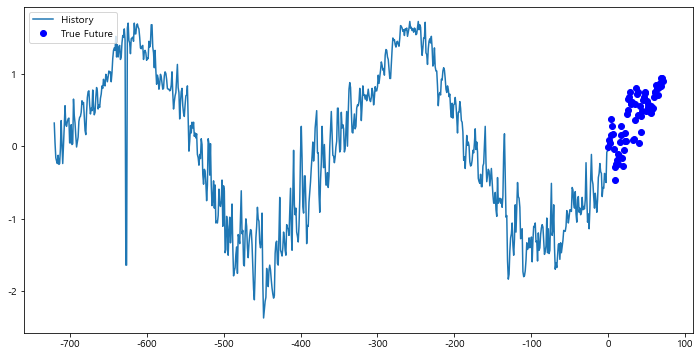

In [69]:
# 오 뭔가 나왔는데 뭔지 모르겠슴
plt.rc('axes', unicode_minus=False)
for x, y in train_data_multi.take(1):
    multi_step_plot(x[0], y[0], np.array([0]))

모델 구성
다단계 예측 모델은 이전 작업보다 약간 복잡하기 때문에 두 개의 LSTM 계층으로 구성
마지막 layer에서는 72개의 예측을 출력

In [70]:
multi_step_model =tf.keras.models.Sequential()
multi_step_model.add(tf.keras.layers.LSTM(32,
                                          return_sequences=True,
                                          input_shape = X_train_multi.shape[-2:]))
multi_step_model.add(tf.keras.layers.LSTM(16, activation='relu'))
multi_step_model.add(tf.keras.layers.Dense(72))

multi_step_model.compile(optimizer=tf.keras.optimizers.RMSprop(clipvalue=1.0),
                         loss='mae')

print(multi_step_model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 720, 32)           4608      
_________________________________________________________________
lstm_1 (LSTM)                (None, 16)                3136      
_________________________________________________________________
dense (Dense)                (None, 72)                1224      
Total params: 8,968
Trainable params: 8,968
Non-trainable params: 0
_________________________________________________________________
None


모델 학습

In [73]:
EVALUATION_INTERVAL=200
EPOCHS=10

multi_step_history = multi_step_model.fit(train_data_multi, epochs=EPOCHS,
                                          steps_per_epoch=EVALUATION_INTERVAL,
                                          validation_data=val_data_multi,
                                          validation_steps=50)

Epoch 1/10
200/200 [==============================] - ETA: 0s - loss: nan  

ValueError: in user code:

    c:\201814471\setup\envs\py37\lib\site-packages\tensorflow\python\keras\engine\training.py:1233 test_function  *
        return step_function(self, iterator)
    c:\201814471\setup\envs\py37\lib\site-packages\tensorflow\python\keras\engine\training.py:1224 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    c:\201814471\setup\envs\py37\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    c:\201814471\setup\envs\py37\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    c:\201814471\setup\envs\py37\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    c:\201814471\setup\envs\py37\lib\site-packages\tensorflow\python\keras\engine\training.py:1217 run_step  **
        outputs = model.test_step(data)
    c:\201814471\setup\envs\py37\lib\site-packages\tensorflow\python\keras\engine\training.py:1183 test_step
        y_pred = self(x, training=False)
    c:\201814471\setup\envs\py37\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    c:\201814471\setup\envs\py37\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:223 assert_input_compatibility
        str(tuple(shape)))

    ValueError: Input 0 of layer sequential is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 1)


학습결과 플로팅

In [72]:
def plot_train_history(history, title):
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(loss))

    plt.figure()

    plt.plot(epochs, loss, 'b', label = 'Training loss')
    plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
    plt.title(title)
    plt.legend()

    plt.show()

plot_train_history(multi_step_history, 'Multi-Step Training and validation loss')

NameError: name 'multi_step_history' is not defined